In [12]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt 

In [13]:
def rotation(A,l,k,v): 
# A er matricen der skal diagonaliseres
# l, k er positionerne for rotationsledende og positionerne i A der bliver minimeret
# v er en mastrix bestående af basisvektorene
    
    B = np.copy(A)    
    w = np.copy(v)
    tau = (A[l,l] - A[k,k]) / (2 * A[k,l])
#tau er defineret sådan så vi får en andengradsligning

    tplus  = -tau + np.sqrt(1 + tau**2)
    tminus = -tau - np.sqrt(1 + tau**2)
#Udfra betingelsen at b_kl = 0, får vi en andengradsligning med disse løsninger for t        

    if abs(tplus) < abs(tminus):
        t = tplus
    else:
        t = tminus
#Vi skal åbenbart altid vælge den mindre t?
        
    c = 1 / (np.sqrt(1 + t**2))
    s = t * c
    for j in range(len(v)):

        w[j,k] =   c * v[j,k] - s * v[j,l]
        w[j,l] =   s * v[j,k] + c * v[j,l]

#Vi fandt ud af ved testing at, hvis vi bruger rotatione matricen, sker der kun noget med k'te og l'te række i vær emkel søjle

    B[k,k] = A[k,k] * c**2 - 2 * A[k,l] * c * s + A[l,l] * s**2
    B[l,l] = A[l,l] * c**2 + 2 * A[k,l] * c * s + A[k,k] * s**2
    B[k,l] = B[l,k] = 0
# Her sker selve rotationen

    for i in range(len(A)):
        if i != k and i != l:
            B[i,k] = B[k,i] = A[i,k] * c - A[i,l] * s
            B[i,l] = B[l,i] = A[i,l] * c + A[i,k] * s
#Alle andre led i k,l -række/søjle ændrer også værdi


    return B,w

In [14]:
def condition(A, max_value):
#condition som stopper alogrithmen (returner False) ligeså snart den ikke finder nogen værdi som ligger over max
    for i in range(len(A)):
        for j in range(len(A)):
            if i !=j:
                if np.abs(A[i,j]) > max_value:
                    return True
    return False

In [15]:
def diag_A(A, tol = 10**(-10), max_count =1000): 
    n = len(A)    
    v = np.eye(n,n)
    count = 0
    while condition(A, tol) and count < max_count:    
        highestmatrixentry = 0  
        for i in range(len(A)):
            for j in range(len(A)):
                if i != j: 
                    if np.abs(A[i,j]) > highestmatrixentry:
                        highestmatrixentry = np.abs(A[i,j])
                        l, k = i, j
    #Finder positionen af den højeste matrice indgang, med et loop som går igennem alle indgangene og opdaterer den højeste indgangs vœrdi/position
        A,v = rotation(A,l,k,v)
        count += 1  
    #sort eigenvalues
    lam = np.diag(A)
    ind_sort = np.argsort(lam)
    vT = v.T
    lam_sort = np.zeros(lam.shape)
    vT_sort = np.zeros(vT.shape) 
    for i in range(len(lam)):
        ind = ind_sort[i]
        lam_sort[i] = lam[ind]
        vT_sort[i] = vT[ind]
    #returns sorted eigen values and sorted eigenvectors column-wise
    return lam_sort, vT_sort

In [16]:
#Defines matrix A with potential and h-values
def discretize_HO(integrationpoints,rho_min = 0, rho_max = 10):
    h = (rho_max -rho_min) / integrationpoints
    print(h)
    rho = np.array([rho_min +i *h for i in range(1,integrationpoints)])
    d = 2.0/h**2 * np.eye(integrationpoints -1) + np.diag(rho**2)
    e_upper = - 1.0/h**2 * np.eye(integrationpoints -1 , k=1)
    e_lower = - 1.0/h**2 * np.eye(integrationpoints -1 , k=-1)
    return d + e_lower + e_upper, rho

In [122]:
#function that diagonalizes the discretized  quantum mechanics problem, and plots the eigfunctions against rho
def main():
    integration_points = [i*10 for i in range(1, 11)]
    rho_max = [5, 7.5, 10]
    lam_theo = [3 + i*4 for i in range(N)]
    A,rho = discretize_HO(150, rho_max=5)
    lam, u = diag_A(A)
    plt.figure(figsize=(10,10))
    for i in range(3):
        plt.plot(rho , u[i]**2, label = "$\lambda$ = %.4f" %lam[i] )
    plt.legend(loc = 'best', fontsize = 24)
    plt.xlabel(r"$\rho$", fontsize = 24)
    plt.ylabel(r"|u($\rho$)|$^2$", fontsize = 24)
    plt.savefig('plotproject2.png')
    plt.show()



In [123]:
eigval,v = diag_A(A)
def orthogonalitytest(v,exactness):
    
    print('Test: orthogonality of Eigenvectors:')
    
    T = np.dot(np.transpose(v),v)
    print('Inner product', np.dot(np.transpose(v),v))
    
    for i in range(len(A)):
        for j in range(len(A)):
            if i == j: 
                if T[i,j] < 1 - exactness or T[i,j] > 1 + exactness:
                    return False
                else:
                    pass
            if i!= j: 
                if T[i,j] < 0 - exactness or T[i,j] > 0 + exactness:
                    return False
                else:
                    pass
    return True



In [124]:
def eigenvaluetest(eigval,exactness):
  
    d = 2
    a = -1
    N = len(A)

    anal_eigvalues = np.zeros(len(A))
    j = np.arange(1,len(A)+1,1)

    #find analytical eigenvalues:    
    for i in range(len(A)):
        anal_eigvalues[i] = d + 2 * a * np.cos((j[i] * np.pi)/ (N + 1))
        #anal_eigvalues.append(anal_eigval)
    
    print(anal_eigvalues)
    
    for i in range(len(A)-1):
        print(i)
        print(eigval[i])
        print(anal_eigvalues[i])
        if eigval[i] > anal_eigvalues[i] + exactness or eigval[i] < anal_eigvalues[i] - exactness:
            return False
        
    return True
        
        

0.03333333333333333


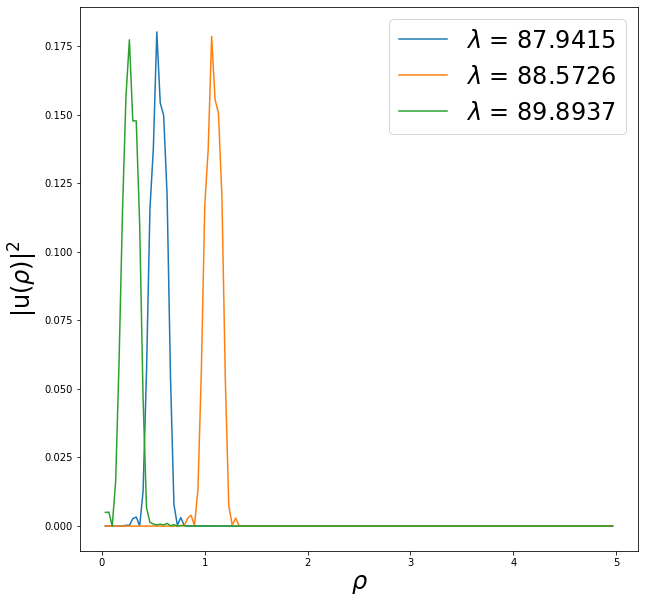

In [125]:
main()

In [ ]:
#relative error: 

